<h1><center> Storytelling With Data</h1></center>
<h2><center> The Journey of a Nation: Telling a Story With U.S. Census Data</h2></center>

### **By**: Ashley Steele

# Project Outline

[1. About the Dataset](#1.-About-the-Dataset)

[2. Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)
* [2.1: Data Validation and Initial Exploration](#2.1:-Data-Validation-and-Initial-Exploration)
* [2.2: Data Cleaning and Feature Engineering](#2.2:-Data-Cleaning-and-Feature-Engineering)
* [2.3. Creation of Geographic Regions and Divisions](#2.3.-Creation-of-Geographic-Regions-and-Divisions)


[3. Data Analysis and the Story](#3.-Data-Analysis-and-the-Story)
* [3.1: Question 1: How does the ethnicity of the United States look by region and division?](#3.1:-Question-1:-How-does-the-ethnicity-of-the-United-States-look-by-region-and-division?)
    * [3.1a: Subquestion: Why is ethnicity in the Midwest region so different from the other regions and what is happeing with the outliers in the Native population?](#3.1a:-Subquestion:-Why-is-ethnicity-in-the-Midwest-region-so-different-from-the-other-regions-and-what-is-happeing-with-the-outliers-in-the-Native-population?)
* [3.2: Q2: How does sex vary by region and division?](#3.2:-Q2:-How-does-sex-vary-by-region-and-division?)
    * [3.2a: Subquestion: What does the distribution of sex look like at the division level?](#3.2a:-Subquestion:-What-does-the-distribution-of-sex-look-like-at-the-division-level?)
* [3.3: Q3: Is there relationship between percent women and income per capita? If yes, what type of relationship is it?](#3.3:-Q3:-Is-there-relationship-between-percent-women-and-income-per-capita?-If-yes,-what-type-of-relationship-is-it?)
* [3.4: Statistical Questions](#3.4:-Statistical-Questions)

[4. Reflection/Future Implications](#4.-Reflection/Future-Implications)
* [4.1: Further Research Implications](#4.1:-Further-Research-Implications)
* [4.2: Reflection](#4.2:-Reflection)

## 1. About the Dataset
[Return to Outline](#Project-Outline)

The dataset for this project is the U.S. Census Demographic Data - 2017 from Kaggle.com. The original data can be found here :[https://www.kaggle.com/muonneutrino/us-census-demographic-data]. 

I chose this dataset due to the large, varried number of records and my personal curiosity to know if, and how, specific features of demographic information, such as ethnicity and sex, varried over geographical regions.

## 2. Exploratory Data Analysis
[Return to Outline](#Project-Outline)

### 2.1: Data Validation and Initial Exploration
[Return to Outline](#Project-Outline)

In [102]:
#Import all needed packages & get python ready to look at dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab 
import statistics as stats
import scipy.stats as scipy
from pylab import rcParams
import os

In [103]:
from pylab import rcParams

In [104]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [105]:
#Let's get our working directory in order so we can load our dataset.
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

In [106]:
os.chdir('C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets')

In [107]:
os.getcwd()

'C:\\Users\\gothv\\OneDrive\\Desktop\\Data\\Datasets'

In [108]:
df = pd.read_csv('acs2017_county_data.csv')

In [109]:
#Initial look at the first few rows of our dataframe.
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [110]:
#What are the features of this dataframe?
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment'], dtype='object')

In [111]:
#What are the datatypes for this dataframe?
df.dtypes

CountyId              int64
State                object
County               object
TotalPop              int64
Men                   int64
Women                 int64
Hispanic            float64
White               float64
Black               float64
Native              float64
Asian               float64
Pacific             float64
VotingAgeCitizen      int64
Income                int64
IncomeErr             int64
IncomePerCap          int64
IncomePerCapErr       int64
Poverty             float64
ChildPoverty        float64
Professional        float64
Service             float64
Office              float64
Construction        float64
Production          float64
Drive               float64
Carpool             float64
Transit             float64
Walk                float64
OtherTransp         float64
WorkAtHome          float64
MeanCommute         float64
Employed              int64
PrivateWork         float64
PublicWork          float64
SelfEmployed        float64
FamilyWork          

**The information above lines up perfectly with the documentation provided for this dataset about what type of data I should expect for each feature. I ran the data type check above to see if there was anything that looked odd such as a percentage that should be a float but is an interger. Thankfully, everything lined up and made logical sense for the data type. Documentation for the expected data types can be found at the link in the header of this report.**

In [112]:
#Double checking to make sure the amount of states (including Washington D.C. and Puerto Rico)
# expected to be in the data set is actually there.
df.State.describe()

count      3220
unique       52
top       Texas
freq        254
Name: State, dtype: object

### 2.2: Data Cleaning and Feature Engineering
[Return to Outline](#Project-Outline)

**When running the data during my first exploration I noticed that the feature- "Child Poverty" had null values.** 

In [113]:
#Let's find out where, exactly, there is a null value in child poverty.
df[df['ChildPoverty'].isna()]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
548,15005,Hawaii,Kalawao County,86,41,45,4.7,20.9,0.0,0.0,29.1,33.7,84,61750,11280,46024,7959,12.7,NaN,22.2,38.1,20.6,0.0,19.0,32.8,9.4,0.0,40.6,10.9,6.3,6.6,63,34.9,61.9,3.2,0.0,0.0


**I decided to leave this value as null so it isn't factored into any mean calculations, thus skewing data.**

In [114]:
#Overview of the statstical information for our datatset
df.describe()

,CountyId,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3220.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.00000,3220.000000,3220.000000,3220.000000,3219.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,31393.605280,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,0.083416,7.130952e+04,48994.966770,3138.61677,25657.033230,1514.442547,16.780776,23.040634,31.479814,18.214286,21.878944,12.592360,15.835745,79.630963,9.851646,0.938975,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,16292.078954,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,0.709277,2.108691e+05,13877.178398,2405.78695,6667.520452,1156.708587,8.309360,11.891934,6.523912,3.742308,3.167228,4.143504,5.808383,7.663900,2.963054,3.072571,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,1001.000000,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.900000e+01,11680.000000,262.00000,5943.000000,129.000000,2.400000,0.000000,11.400000,0.000000,4.800000,0.000000,0.000000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,19032.500000,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,0.000000,8.442250e+03,40622.000000,1729.75000,21568.000000,832.000000,11.475000,14.900000,27.200000,15.800000,19.900000,9.800000,11.500000,77.300000,8.000000,0.100000,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,30024.000000,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,0.000000,1.969900e+04,47636.500000,2587.00000,25139.000000,1225.000000,15.400000,21.500000,30.500000,17.800000,22.100000,12.100000,15.400000,81.000000,9.500000,0.300000,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,46105.500000,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,0.100000,5.036575e+04,55476.000000,3802.00000,28997.000000,1802.500000,19.800000,28.600000,34.900000,20.200000,23.900000,14.800000,19.500000,84.100000,11.300000,0.800000,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,72153.000000,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,33.700000,6.218279e+06,129588.000000,41001.00000,69529.000000,16145.000000,65.200000,83.600000,69.000000,46.400000,37.200000,36.400000,48.700000,97.200000,29.300000,61.800000,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [115]:
#Calculating top 75% of income per capita so I can use this later in my analytics
df['Top_75_IncPerCap'] = np.where(df['IncomePerCap']>= 28997, 1,0)

In [116]:
#Neither of Asian or Pacific Islander go above 50% of population so I have chosen to combine the values
df['AsianPacific'] = df['Asian'] + df['Pacific']

In [117]:
#Since the % of population for both Asian and Pacific was less than 50% I created a new 
# subfeature for these called AsianPacific
#I dropped this information below because it was extra and would skew my data.

df.drop(columns = ['Asian', 'Pacific'], inplace = True)

In [118]:
#What percentage of population, per county, is women and men?
df['PercentWomen']= df['Women']/ df['TotalPop'] *100 
df['PercentWomen'] = df.PercentWomen.round(1)
df['PercentMen']= 100- df['PercentWomen']

In [119]:
#Check to see if this worked in the Hawaii I pulled earlier
df[df['ChildPoverty'].isna()]

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Top_75_IncPerCap,AsianPacific,PercentWomen,PercentMen
548,15005,Hawaii,Kalawao County,86,41,45,4.7,20.9,0.0,0.0,84,61750,11280,46024,7959,12.7,NaN,22.2,38.1,20.6,0.0,19.0,32.8,9.4,0.0,40.6,10.9,6.3,6.6,63,34.9,61.9,3.2,0.0,0.0,1,62.8,52.3,47.7


### 2.3. Creation of Geographic Regions and Divisions
[Return to Outline](#Project-Outline)

In [120]:
#This is way too much data so I want to now break this down into divisions as decided by the U.S. Census bureau
divisions_dict = {
    'New England' : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', np.NaN, np.NaN, np.NaN]
    ,'Mid-Atlantic': ['New Jersey', 'New York', 'Pennsylvania', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'East North Central': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', np.NaN, np.NaN, np.NaN, np.NaN]
    ,'West North Central': ['Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', np.NaN, np.NaN]
    ,'South Atlantic': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'District of Columbia', 'West Virginia']
    ,'East South Central': ['Alabama', 'Kentucky', 'Mississippi','Tennessee', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'West South Central': ['Arkansas', 'Louisiana', 'Oklahoma', 'Texas', np.NaN, np.NaN, np.NaN, np.NaN, np.NaN]
    ,'Mountain': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', np.NaN]
    ,'Pacific': ['Alaska', 'California', 'Hawaii', 'Oregon','Washington', np.NaN, np.NaN, np.NaN, np.NaN] 
}

In [121]:
#Created a new dataframe for the divisions information
divisions_df = pd.DataFrame.from_dict(divisions_dict)
divisions_df = divisions_df.melt(var_name='Division',value_name='State')
divisions_df.dropna(how='any',inplace=True)

In [122]:
#Sanity check- does my new dataframe look like I think it should?
divisions_df

,Division,State
0,New England,Connecticut
1,New England,Maine
2,New England,Massachusetts
3,New England,New Hampshire
4,New England,Rhode Island
5,New England,Vermont
9,Mid-Atlantic,New Jersey
10,Mid-Atlantic,New York
11,Mid-Atlantic,Pennsylvania
18,East North Central,Illinois


In [123]:
#Let's also break the divisions into regions, as per U.S. Census Bureau
regions_dict= {
    'Northeast': ['New England', 'Mid-Atlantic', np.NaN]
    ,'Midwest': ['East North Central', 'West North Central', np.NaN]
    ,'South': ['South Atlantic', 'East South Central', 'West South Central']
    ,'West':['Mountain', 'Pacific', np.NaN]
}

In [124]:
#Created new dataframe for the regions information developed above.
regions_df = pd.DataFrame.from_dict(regions_dict)
regions_df = regions_df.melt(var_name='Region',value_name='Division')
regions_df.dropna(how='any',inplace=True)

In [125]:
#Sanity check- Does my new dataframe look like I expect it to look?
regions_df

,Region,Division
0,Northeast,New England
1,Northeast,Mid-Atlantic
3,Midwest,East North Central
4,Midwest,West North Central
6,South,South Atlantic
7,South,East South Central
8,South,West South Central
9,West,Mountain
10,West,Pacific


In [126]:
#Step 1 of merging information from regions to divisions
divisions_df = pd.merge(regions_df, divisions_df, on='Division', how='outer')

In [127]:
#Cleaned up the index after the merge so it doesn't effect the next step of the merge
divisions_df.reset_index()

,index,Region,Division,State
0,0,Northeast,New England,Connecticut
1,1,Northeast,New England,Maine
2,2,Northeast,New England,Massachusetts
3,3,Northeast,New England,New Hampshire
4,4,Northeast,New England,Rhode Island
5,5,Northeast,New England,Vermont
6,6,Northeast,Mid-Atlantic,New Jersey
7,7,Northeast,Mid-Atlantic,New York
8,8,Northeast,Mid-Atlantic,Pennsylvania
9,9,Midwest,East North Central,Illinois


In [128]:
#Step 2 of merge- add new divisions info from the new df to original df
df= df.merge(right=divisions_df,on='State',how='left')

In [129]:
#Df has two of region and two division. Drop extras and re-name
df.rename({'Region_x': 'Region'}, inplace=True)
df.rename(columns= {'Division_x': 'Division'}, inplace=True)

In [130]:
#Step 3 of merge- add regions info to original df
df= df.merge(right=regions_df, on='Division', how='left')

In [131]:
df.drop(columns='Region_y', inplace=True)


In [132]:
df.rename(columns= {'Region_x':'Region'}, inplace=True)

In [133]:
#Look for null values- I am expecting to see that all null values relate to Puerto Rico, which has no region given
df[['State','Region']][df['Region'].isna()]



,State,Region
3142,Puerto Rico,NaN
3143,Puerto Rico,NaN
3144,Puerto Rico,NaN
3145,Puerto Rico,NaN
3146,Puerto Rico,NaN
3147,Puerto Rico,NaN
3148,Puerto Rico,NaN
3149,Puerto Rico,NaN
3150,Puerto Rico,NaN
3151,Puerto Rico,NaN


In [164]:
#Fix null values in region
df['Region'] = df['Region'].fillna('Other')

In [165]:
#Fix null values in division
df['Division'] = df['Division'].fillna('Other')

In [136]:
df.columns

Index(['CountyId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Top_75_IncPerCap', 'AsianPacific', 'PercentWomen', 'PercentMen', 'Region', 'Division'], dtype='object')

In [137]:
export_df= df[['State', 'County', 'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty', 'Unemployment', 'PercentWomen', 'PercentMen', 'Region', 'Division']]
export_df.head()
#export_df.to_cvs(r'C:\Users\gothv\OneDrive\Desktop\Data\Datasets\census_clean.csv', index=None, header=True)

,State,County,TotalPop,Income,IncomePerCap,Poverty,ChildPoverty,Unemployment,PercentWomen,PercentMen,Region,Division
0,Alabama,Autauga County,55036,55317,27824,13.7,20.1,5.2,51.1,48.9,South,East South Central
1,Alabama,Baldwin County,203360,52562,29364,11.8,16.1,5.5,51.1,48.9,South,East South Central
2,Alabama,Barbour County,26201,33368,17561,27.2,44.9,12.4,46.7,53.3,South,East South Central
3,Alabama,Bibb County,22580,43404,20911,15.2,26.6,8.2,45.7,54.3,South,East South Central
4,Alabama,Blount County,57667,47412,22021,15.6,25.4,4.9,50.6,49.4,South,East South Central


In [138]:
writer = pd.ExcelWriter('output.xlsx')
export_df.to_excel(writer,'Sheet1')
writer.save()

**I want to play with the data to see if I can manipulate it to help make it easier to see connections/correlations between features.**

In [139]:
#Setting up data so I can combine and select specific features 
cols= [col for col in df.columns]


In [140]:
ethnicities = df[['Hispanic', 'White', 'Black', 'Native', 'AsianPacific' ]]

In [141]:
#Creating a subset so I can just look at ethnicities and how they relate 
for name in ethnicities:
    cols.remove(name)
cols

['CountyId',
 'State',
 'County',
 'TotalPop',
 'Men',
 'Women',
 'VotingAgeCitizen',
 'Income',
 'IncomeErr',
 'IncomePerCap',
 'IncomePerCapErr',
 'Poverty',
 'ChildPoverty',
 'Professional',
 'Service',
 'Office',
 'Construction',
 'Production',
 'Drive',
 'Carpool',
 'Transit',
 'Walk',
 'OtherTransp',
 'WorkAtHome',
 'MeanCommute',
 'Employed',
 'PrivateWork',
 'PublicWork',
 'SelfEmployed',
 'FamilyWork',
 'Unemployment',
 'Top_75_IncPerCap',
 'PercentWomen',
 'PercentMen',
 'Region',
 'Division']

In [142]:
#Doing a melt on the dataframe so I can look at the individual values for ethnicity and make comparisons.
ethnicity_df= pd.melt(df, id_vars=cols, value_vars=ethnicities, var_name='Ethnicity', value_name='EthnicityPercentage')

In [143]:
#Sanity Check- Did my melt work correctly? Do my data look like I expected?
ethnicity_df.groupby(['Ethnicity']).count()

,CountyId,State,County,TotalPop,Men,Women,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Top_75_IncPerCap,PercentWomen,PercentMen,Region,Division,EthnicityPercentage
Ethnicity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AsianPacific,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3219,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
Black,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3219,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
Hispanic,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3219,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
Native,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3219,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220
White,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3219,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220,3220


## 3. Data Analysis and the Story
[Return to Outline](#Project-Outline)

### 3.1: Question 1: How does the ethnicity of the United States look by region and division?
[Return to Outline](#Project-Outline)


While looking at the visual of this information some things stood out to me:

 1. The **South** and **West** have a **predominatly** White population
 2. The **South** has the **largest Black population** in the regions
 3. The **West** has the **largest Hispanic population** in the regions
 4. The **Northeast** has a **predominatly White** population with a **slightly more equal Hispanic and Black population**.
 5. **Other** (a.k.a. Puerto Rico) has a **predominatly Hispanic population** as I expected.
 6. The **Midwest** region has the most interesting distribution of ethnicity, although **predominatly White**. The amount of **outliers** in the **Native population was interesting to me**.
 
I wanted to know more indepth info about how ethnicity in the Midwest Region broke down by state to see if this could explain the outliers and "weird" distribution. The visual below breaks this information down into the state level.

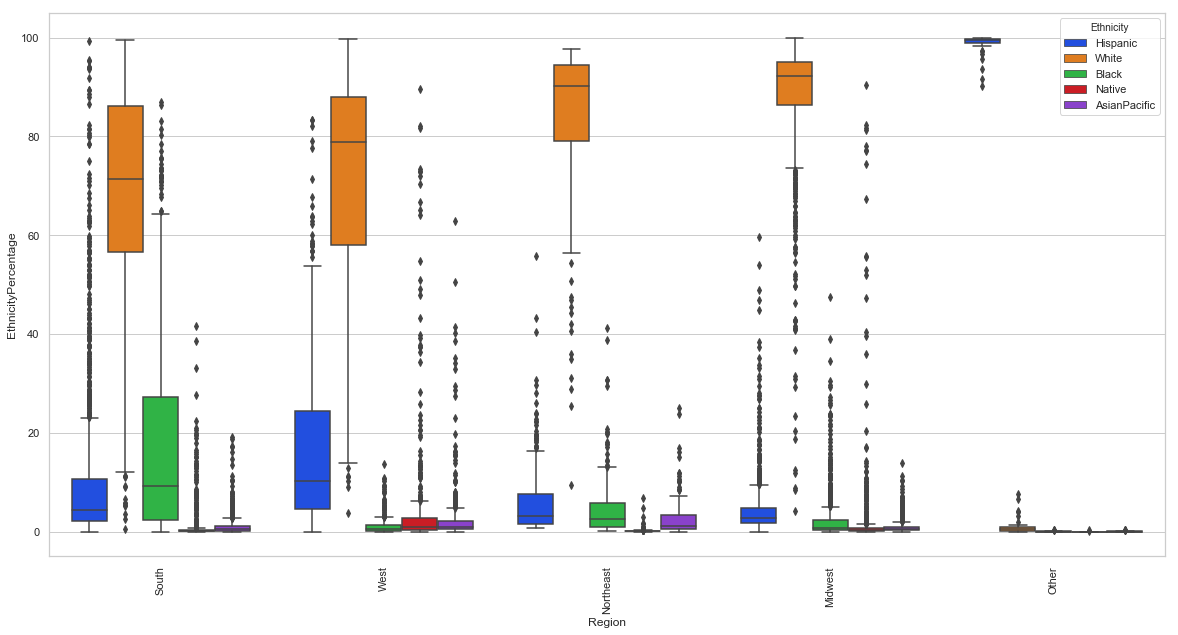

In [161]:
# Visualization of ethnicity by region
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(x="Region", y="EthnicityPercentage", hue='Ethnicity', data=ethnicity_df, palette = 'bright')
plt.xticks(rotation=90);

#### 3.1a: Subquestion: Why is ethnicity in the Midwest region so different from the other regions and what is happeing with the outliers in the Native population?
[Return to Outline](#Project-Outline)

After creating the new data frame and visual below I noticed the following information that helped to explain the interesting data for the Midwest Region. **South Dakota**, as expected, has a **large Native population** (much larger than any other state in the entire dataset) causing the interesting looking outliers for the Native population. **Kansas and Nebraska** have the **largest and second largest Hispanic population** in this region and **Illinois and Michigan** have the **largest and second largest Black population**, respectively.

In [162]:
#Created a new dataframe to isolate the information in the Midwest region only
midwest_df= ethnicity_df[ethnicity_df['Region']=='Midwest']

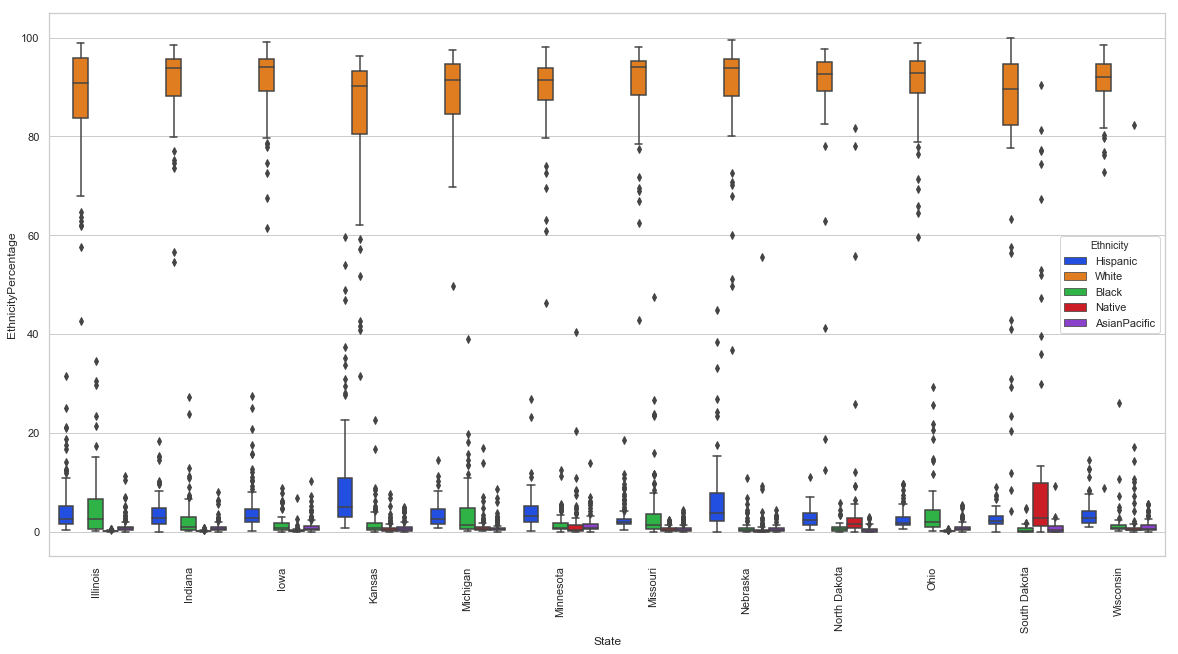

In [163]:
#Creating a visual to break down ethnicity in the Midwest region by state
sns.set(style='whitegrid')
plt.figure(figsize=(20,10))
sns.boxplot(x="State", y="EthnicityPercentage", hue='Ethnicity', data=midwest_df, palette = 'bright')
plt.xticks(rotation=90);

### 3.2: Q2: How does sex vary by region and division?
[Return to Outline](#Project-Outline)

While looking at the data for sex by region I noticed the following interesting things:
1. Overall, the **distribution of men and women** in the dataset is **almost 50/50**
2. In the **West** region there are **slightly more men**
3. In the **South and Northwest** regions there are **slighly more women**
4. In **Puerto Rico** (labeled in this dataset as **other**) there is a **much higher percentage of women than men**.

In [148]:
#Created another variable to create a subset of information to look at sex and region
cols2=[name for name in ethnicity_df.columns]

In [149]:
# Removed precentages for men and women
cols2.remove('PercentMen')
cols2.remove('PercentWomen')

In [150]:
# Melted dataframe to get a better look at sex
sex_prc_df= pd.melt(ethnicity_df, id_vars=cols2, value_vars=['PercentMen', 'PercentWomen'], var_name='Sex', value_name='SexPercentage')

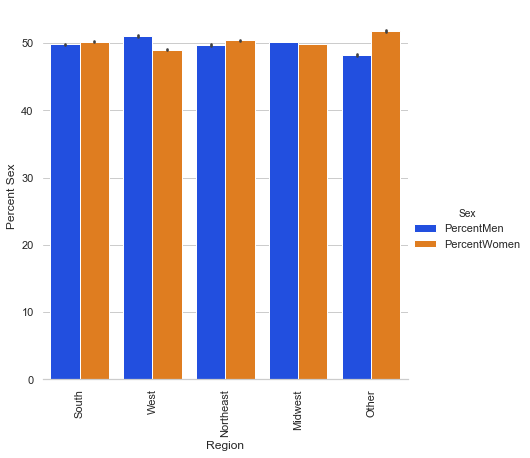

In [166]:
#Created a visual for the percentage of men vs. women in each region.
sns.set(style="whitegrid")
g= sns.catplot(x='Region', y='SexPercentage', hue='Sex', data=sex_prc_df, height=6, kind='bar', palette= 'bright')
g.despine(left=True)
g.set_ylabels("Percent Sex")
plt.xticks(rotation = 90);

#### 3.2a: Subquestion: What does the distribution of sex look like at the division level?
[Return to Outline](#Project-Outline)

At the Division level I noticed several interesting trends in relation to sex and geographic location. For **women** the **most popular geographic divisions** to live in are the **East South Central, North East, and Puerto Rico** (which has a much larger female population.) For **men the most popular divisions** were **Pacific, Mountian, and Western South Central**. **All other geographical divisions** had **mostly evenly distributed sex**, with **East North Central and West North Central** having an almost completely **even distribution of percent men and women**.

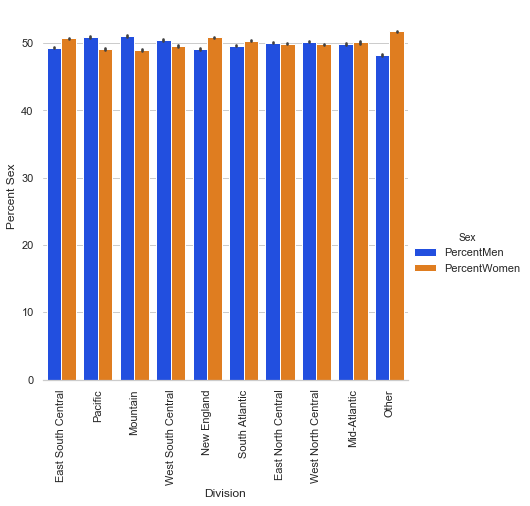

In [167]:
#Created a visual to look at percentage of men vs. percentages of women in each division.
sns.set(style="whitegrid")
g= sns.catplot(x='Division', y='SexPercentage', hue='Sex', data=sex_prc_df, height=6, kind='bar', palette = 'bright')
g.despine(left=True)
g.set_ylabels("Percent Sex")
plt.xticks(rotation = 90);

### 3.3: Q3: Is there relationship between percent women and income per capita? If yes, what type of relationship is it?
[Return to Outline](#Project-Outline)

First, I decided to see if there was a relationship between the percentage of women and the income per capita per state. After running the visualization I determined that there was **not really a correlation between these two features (percentage of women and income per capita)**. Next, I wanted to see if there was any type of relationship we could determine from the data within our dataframe.  While running the pairplot I noticed that **professional workers and income per capita** seem to have a **slightly positive correlation**.

In [153]:
#Created a new dataframe to look only at percentage of women vs. income per capita
new_df= df.drop(columns=['Professional','Service','Office','Construction','Production','Drive','Carpool','Transit','Walk',
 'OtherTransp','WorkAtHome','MeanCommute','Employed','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Unemployment'])

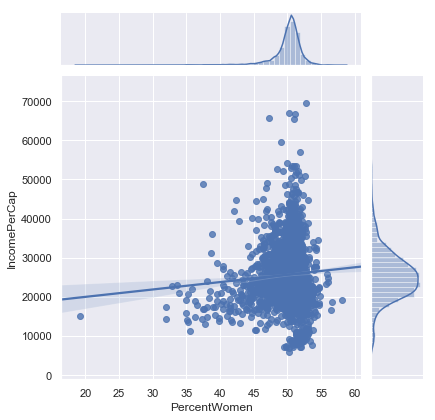

In [154]:
#Created a visualization to see if there was a correlation between the percentage of women and the income per capita
sns.set(style='darkgrid')
women_income=sns.jointplot('PercentWomen','IncomePerCap', data=new_df, kind='reg');

Based on this information above I wanted to take a deeper look to see how percentage of women in a geographical area related to income per capita, if at all.

In [155]:
#Created a new dataframe for percentage of women and type of profession
professions_women_df= df[['State', 'County', 'Division', 'Region','Professional',
 'Service','Office', 'Construction', 'Production','PercentWomen', 'IncomePerCap']]

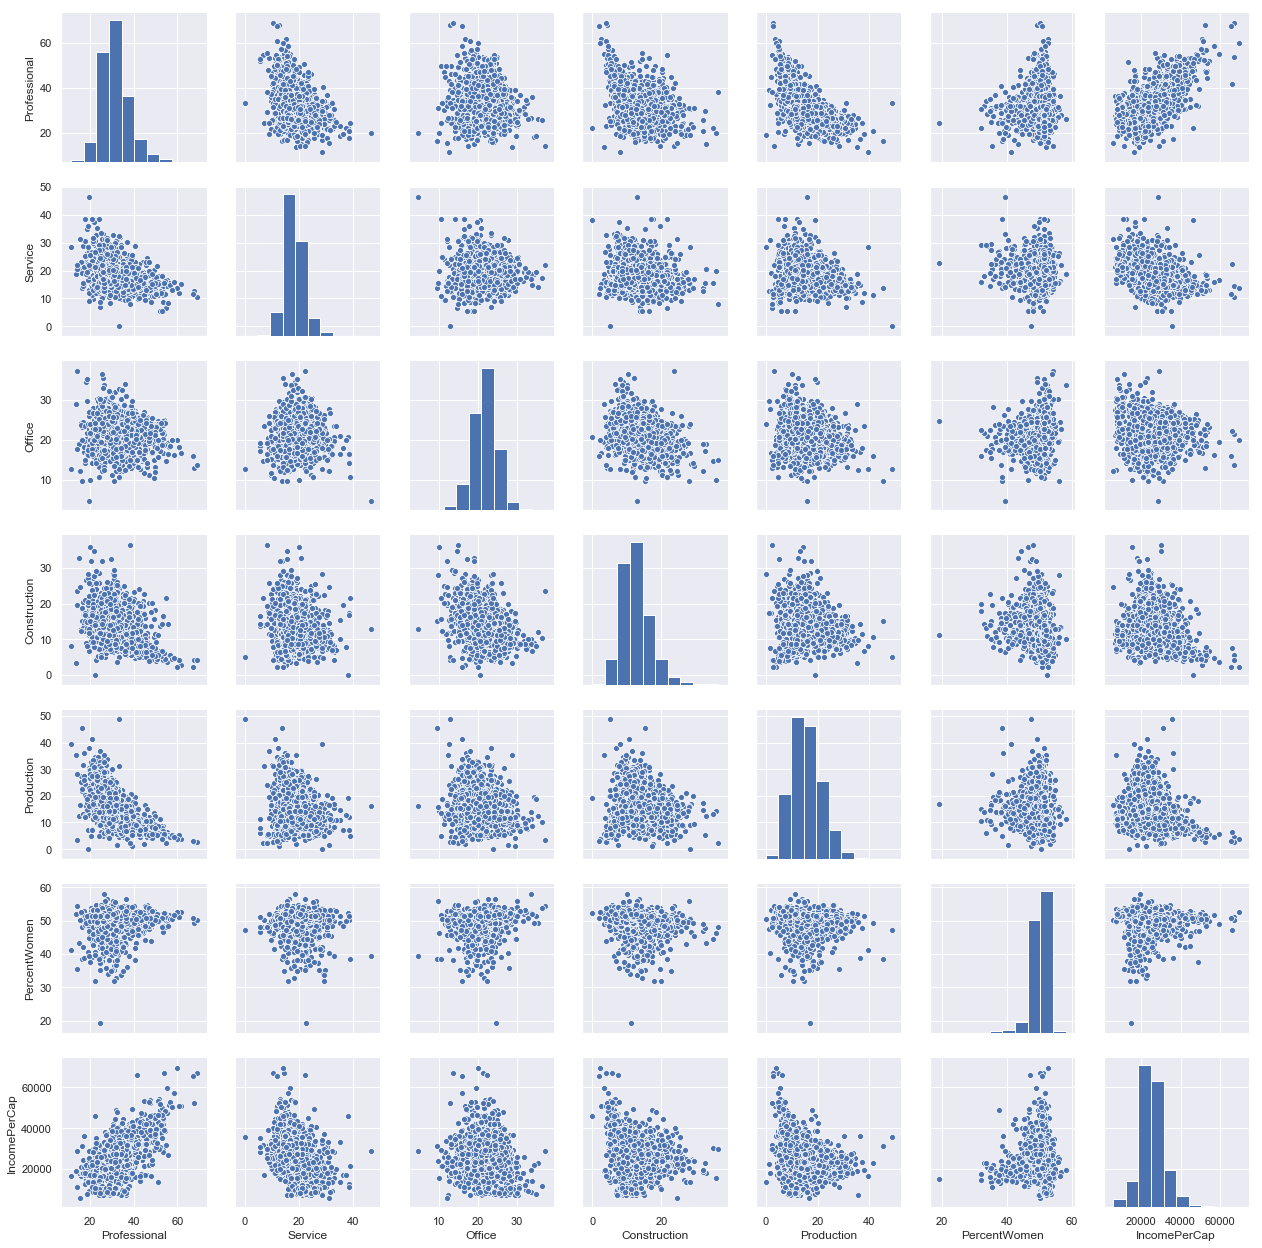

In [156]:
#Checking to see if there are any correlations between the information in this dataframe.
sns.pairplot(professions_women_df);

### 3.4: Statistical Questions
[Return to Outline](#Project-Outline)

**I need some explanation here as to why I did stats!**

In [157]:
# What is the total variance of income per capita in the dataset?
inc= df.IncomePerCap
tot_inc_var=stats.variance(inc) 
print('The variance in income per capita for the full data set is ${}'.format(round(tot_inc_var,2)))

#What is the standard deviation for income per capita in the dataset?
std_inc=stats.stdev(inc)
print('The standard deviation of income per capita for the full data set is {}'.format(round(std_inc,2)))

#What is the standard error for these calculations and this dataset?
standard_error = std_inc / (df['IncomePerCap'].count() ** 0.5)
print('The standard error of income per captita for the full data set is {}'.format(round(standard_error,2)))

The variance in income per capita for the full data set is $44455828.97
The standard deviation of income per capita for the full data set is 6667.52
The standard error of income per captita for the full data set is 117.5


I want to use a t-test and p-value to determine if income per capita can predict region/division.

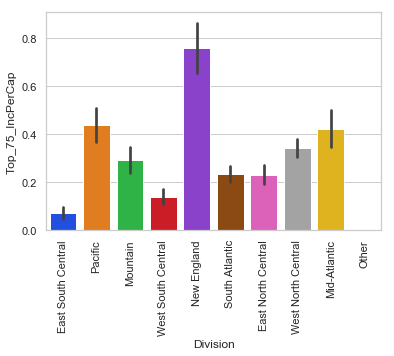

In [168]:
#How are divisions and income per capita in the top 75% related, if at all?
sns.barplot(x='Division', y='Top_75_IncPerCap', data=df, palette = 'bright')
plt.xticks(rotation = 90);

In [159]:
#Based on the graph above I noticed that New England appears to have the largest percentage of income per capita in the top 75%
df['New_England']= np.where(df['Division']=='New England',1,0)

**Based on the info above I wanted to see if my hypothesis that if you reside in New England you are more likely to be in the top 75% of income per capita was true. I ran a t-test and calculated the p-value to see if my hypothesis was correct. Based on the fact that my t-test value was high means that a significant difference between the means of my two selected features. My p-value, however, is small, thus meaning my null hypothesis is incorrect.**

In [160]:
 #Calculate t-test and p-value for top 75% of income per capita and New England
scipy.stats.ttest_ind(df.Top_75_IncPerCap, df.New_England, equal_var=False)

Ttest_indResult(statistic=28.520712199303162, pvalue=1.0416951048365757e-162)

## 4. Reflection/Future Implications
[Return to Outline](#Project-Outline)

### 4.1: Further Research Implications
[Return to Outline](#Project-Outline)

**After working on this project I am left with several questions and areas I would like to explore more. Each of the questions I posed in for this capstone generated more ideas of ways to explore relationships with my dataset. Given more time, and additional data, I would like to do more exploration for the following questions:**

* Why is there such a large number of women in comparison to men in Puerto Rico? I have to wonder what factors could contribute to this disparity, such as men moving off the island to find work, higher mortality rate for men, and potential earning power for men vs. women.

* What causes the distribution of specific ethnicities in specific regions and divisions? 

* Why do some regions and divisions in the United States seem to have a more evenly distributed percentage of men vs. women than other areas?

* How much variance is there between the income per capita of women vs. men in the United States?

* How does highest level of education and ethnicity effect the income per capita of both men and women in the United States?

**Additional data that would help in my exploration of the last four questions could be educational data (such as highest level of education completed by ethnicity for state), popular types of professions broken down into more specific types,income per capita by ethnicity & sex.**
    

### 4.2: Reflection
[Return to Outline](#Project-Outline)

I thoroughly enjoyed working on this project and digging deeper into what the demographics of the United States actually looked like in 2017. Now that I have a better understanding of how to manipulate the data and use Python and pandas to to look for specific answers to my questions I am looking forward to the opportunity to extend this initial data project into more. I plan to create a Tableau map to break this information down deeper and I would like to use this data, along with other year's data, to create some machine learning models to practice and satisfy my curiosity!